In [1]:
import cv2 as cv
import common #some useful opencv functions
import numpy as np # matrix manipulations
import time

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [2]:
def rotate_crop(image):
    h,w = image.shape[:2]
    center = (w/2, h/2)
    angle = 180
    scale = 1.0
    M = cv.getRotationMatrix2D(center, angle, scale)
    image = cv.warpAffine(image, M, (w, h))
    image = image[200:1000, :]
    return image

In [3]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

In [4]:
def circle_detect(image):
    img = image.copy()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_blurred = cv.medianBlur(gray, 5)
    detected_circles = cv.HoughCircles(gray_blurred, cv.HOUGH_GRADIENT, 1, 30, param1=130, param2=15, minRadius=13, maxRadius=27)
    
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            
            cv.circle(img, (a,b), r, (0, 255, 0), 2)
            cv.circle(img, (a,b), 1, (255, 0, 0), 3)
            
    return img

In [5]:
def circle_detect_values(image):
    img = image.copy()
    gray_blurred = cv.medianBlur(image, 5)
    detected_circles = cv.HoughCircles(gray_blurred, cv.HOUGH_GRADIENT, 1, 30, param1=130, param2=15, minRadius=13, maxRadius=27)
    
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            
            cv.circle(img, (a,b), r, (0, 255, 0), 2)
            cv.circle(img, (a,b), 1, (255, 255, 0), 3)
            
    return img

In [6]:
def process_frame(image):
    ## Rotate/Crop Image
    image = rotate_crop(image)

    ## Brighten Image
    image = adjust_gamma(image, 3.5)
    
    ## Find Circles
    with_circles = circle_detect(image)
    return with_circles

In [7]:
def to_rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

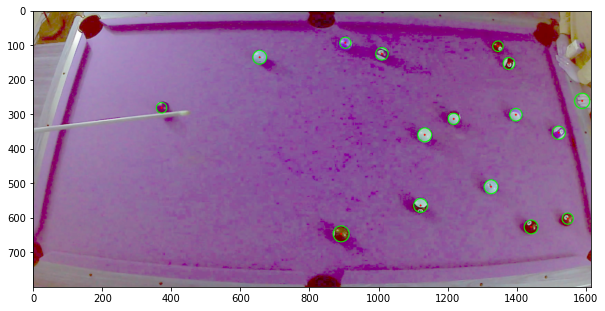

In [17]:
cap = cv.VideoCapture('./video/test_game.mov')
counter = 1
while cap.isOpened():
    ret, frame = cap.read()
    if counter == 400:
        break;
    counter += 1

circle_frame = process_frame(frame)
plt.imshow(circle_frame)

In [18]:
## Change Constrast
frame = rotate_crop(frame)

## Brighten Image
frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
h,s,v = cv.split(frame)
hsv_frame = np.concatenate((h,s,v), axis=1)

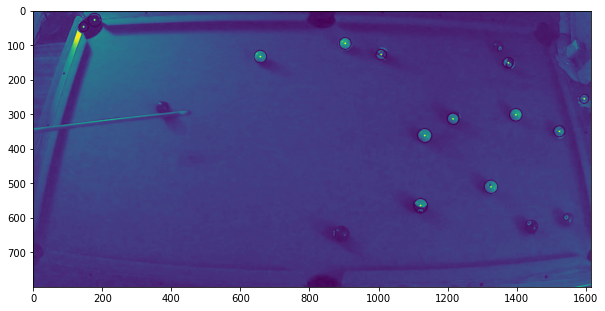

In [19]:
v_circle = circle_detect_values(v)
plt.imshow(v_circle)

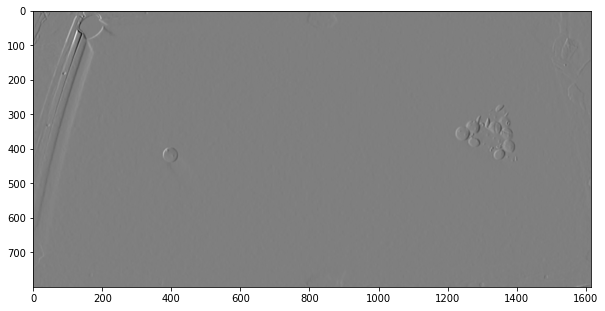

In [11]:
sobelx = cv.Sobel(v,cv.CV_64F,1,0,ksize=9)
sobely = cv.Sobel(v,cv.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 

In [12]:
cap = cv.VideoCapture('./video/test_game.mov')
counter = 1
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    if counter > 300 and counter < 450:
        circle_frame = process_frame(frame)
        # Display the resulting frame
        cv.imshow('frame', circle_frame)
        time.sleep(.1)
    if counter > 450:
        break
    counter += 1
    if cv.waitKey(1) == ord('q'):
        break
    
    

cap.release()
cv.destroyAllWindows()
cv.waitKey(1)

-1